Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°3** 
##**Tema**: Operadores Genéticos##

Integrante: Herrera, Franco Nahuel

## Ejercicio 1
Implemente los operadores de selección con Ruleta con pesos, con S.U.S y con Torneo, completando el código dado.

In [ ]:
import random
def sel_ruleta(F, cant_selectos, eps):
    """ Operador de selección por ruleta.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
    
    min_f = min(F)
    f_norm = [fi - min_f + eps for fi in F]
    sum_f = sum(f_norm)
    c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
    S = [None]*cant_selectos
    for k in range(cant_selectos):
        r=random.random()
        for i, ci in enumerate(c):
            if r <= ci:
                S[k] = i
                break
    return S
 
def sel_sus(F,cant_selectos,eps):
  """ Operador de selección sus.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
  min_f = min(F)
  f_norm = [fi - min_f + eps for fi in F]
  sum_f = sum(f_norm)
  c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
  S = [None]*cant_selectos
 
  rnd = random.random()/cant_selectos
  for k in range(cant_selectos):
   r = rnd + k / cant_selectos
   for i, ci in enumerate(c):
       if r <= ci:
        S[k] = i
        break
  return S
 
def sel_torneo(F,cant_selectos,k):
  """ Operador de selección por torneos.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    k: int. tamaño del torneo.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
  S = [0]*cant_selectos
  for i in range(cant_selectos):
    torneo = [random.randint(0,len(F)-1) for i in range(k)]
    v = max([F[t] for t in torneo])
    S[i] = [j for j in torneo if F[j] == v][0]
  return S

In [ ]:
# PRUEBA
F = [0.54, 0.28, 0.16, 0.12]
eps = 0.2
cant_tiros = 5

In [ ]:
#aplicar seleccion
sel_1 = sel_ruleta(F, cant_tiros, eps)

print('Posicion de individuos seleccionados:')
print(sel_1)

Posicion de individuos seleccionados:
[3, 0, 0, 1, 0]


In [ ]:
#aplicar seleccion
sel_2 = sel_sus(F, cant_tiros, eps)

print('Posicion de individuos seleccionados:')
print(sel_2)

Posicion de individuos seleccionados:
[0, 0, 0, 1, 2]


In [ ]:
#aplicar seleccion
k = 5
sel_3 = sel_torneo(F, cant_tiros, k)

print('Posicion de individuos seleccionados:')
print(sel_3)

Posicion de individuos seleccionados:
[1, 0, 0, 0, 0]


## Ejercicio 2
Genere un histograma que muestre la probabilidad de ser seleccionado de cada individuo (basado en su fitness), y un histograma con la cantidad de veces que cada individuo es efectivamente seleccionado. Utilice una población con 10 individuos y los operadores de seleccion implementados en el punto anterior sobre la función de evaluación f(x,y) = -sum(x^2 + y^2). 

In [ ]:
import random
import matplotlib.pyplot as plt

def histograma(pop, fitness, p_selectos, eps):
    #estimo probabilidad de cada individuo de ser seleccionado
    min_f = min(fitness)
    f_norm = [fi - min_f + eps for fi in fitness]
    sum_f = sum(f_norm)
    prob = [fi / sum_f for fi in f_norm]
    
    #obtener cantidad relativa de soluciones obtenidas
    c = [0] * len(prob)
    for p in p_selectos:
        c[p] = c[p] + 1
    cant = [ci / len(p_selectos) for ci in c]

    #obtengo el orden en el que voy a graficar
    psort = sorted(range(len(prob)), key=lambda k: prob[k])

    #mostrar graficas
    plt.figure()
    plt.bar(range(len(prob)), [prob[p] for p in psort])
    plt.title('Probabilidad de cada individuo')
    plt.xlabel('Individuo')
    plt.ylabel('Probabilidad')

    plt.figure()
    plt.bar(range(len(cant)), [cant[p] for p in psort])
    plt.title('Cantidad de veces que fue seleccionado')
    plt.xlabel('Individuo')
    plt.ylabel('Cantidad relativa')

def generar_poblacion(bounds, cant_soluciones):
    pop = []
    for i in range(cant_soluciones):
        s = [random.random() * (b[1] - b[0]) + b[0] for b in bounds]
        pop.append(s)
    return pop

def fitness(S):
    return -sum([xi**2 for xi in S])

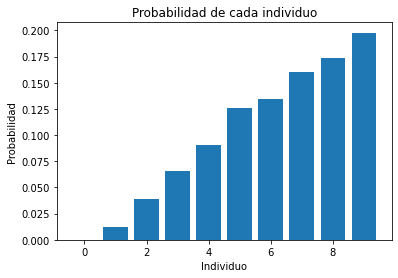

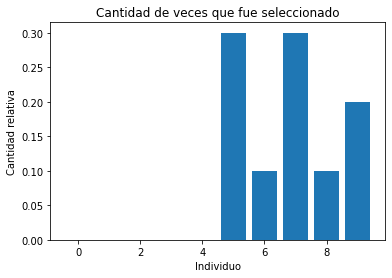

In [ ]:
# PRUEBA RULETA

cant_soluciones = 10
cant_tiros = 10
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_ruleta(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

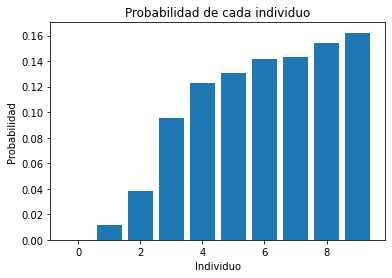

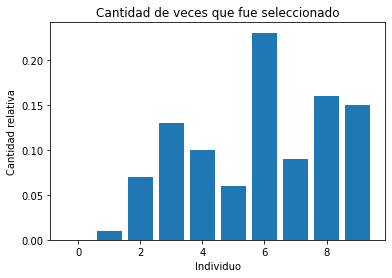

In [ ]:
# PRUEBA RULETA

cant_soluciones = 10
cant_tiros = 100
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_ruleta(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

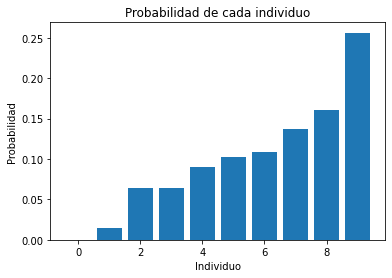

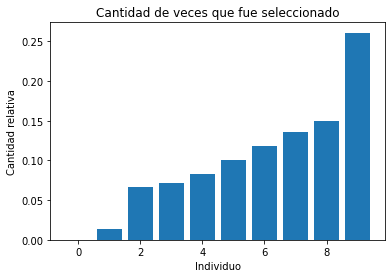

In [ ]:
# PRUEBA RULETA

cant_soluciones = 10
cant_tiros = 1000
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_ruleta(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

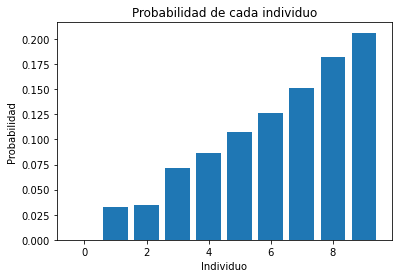

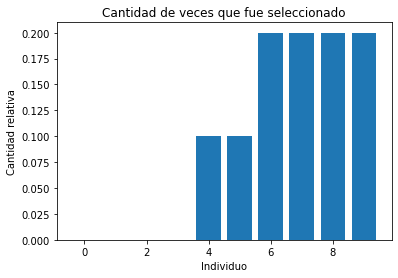

In [ ]:
# PRUEBA SUS

cant_soluciones = 10
cant_tiros = 10
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_sus(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

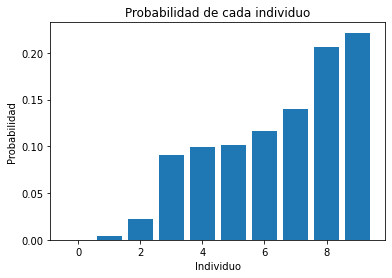

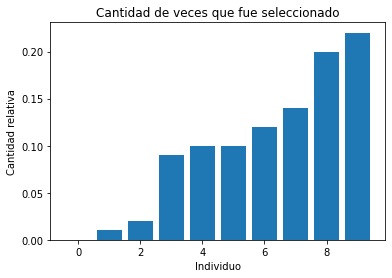

In [ ]:
# PRUEBA SUS

cant_soluciones = 10
cant_tiros = 100
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_sus(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

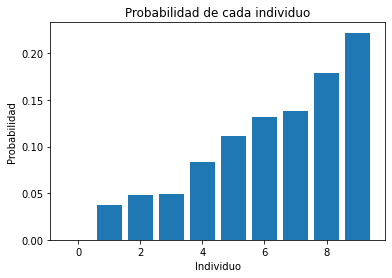

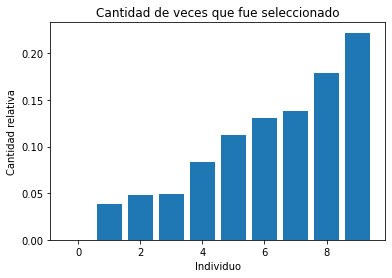

In [ ]:
# PRUEBA SUS

cant_soluciones = 10
cant_tiros = 1000
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
sel = sel_sus(F, cant_tiros, eps)
#mostrar histograma
histograma(pop, F, sel, 0.1)

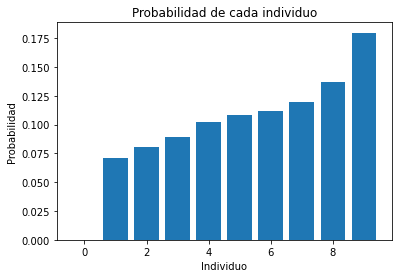

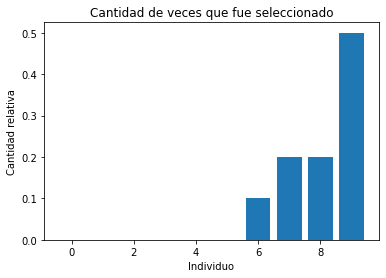

In [ ]:
# PRUEBA TORNEO

cant_soluciones = 10
cant_tiros = 10
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
k = 5
sel = sel_torneo(F, cant_tiros, k)
#mostrar histograma
histograma(pop, F, sel, 0.1)

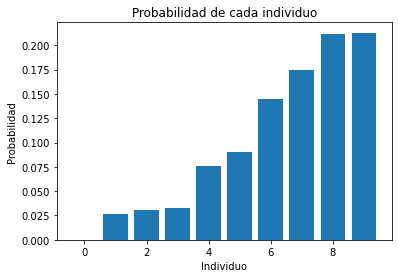

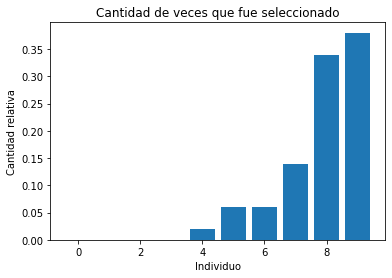

In [ ]:
# PRUEBA TORNEO

cant_soluciones = 10
cant_tiros = 100
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
k = 5
sel = sel_torneo(F, cant_tiros, k)
#mostrar histograma
histograma(pop, F, sel, 0.1)

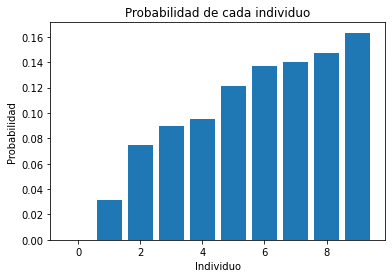

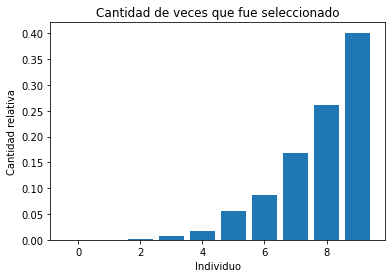

In [ ]:
# PRUEBA TORNEO

cant_soluciones = 10
cant_tiros = 1000
eps = 0.1
bounds = [[0,10], [0,10]] #2 coordenadas 

#generar una poblacion de individuos de prueba
pop = generar_poblacion(bounds, cant_soluciones)
#evaluar cada individuo
F = [fitness(s) for s in pop]
#aplicar seleccion
k = 5
sel = sel_torneo(F, cant_tiros, k)
#mostrar histograma
histograma(pop, F, sel, 0.1)

## Ejercicio 3
Implemente el operador Uniform crossover, completando el código. Luego apliquelos a los dos individuos dados.

In [ ]:
import random

def xov_uniform(P1, P2):
    """Operador Uniform Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list
        Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list
        Lista correspondiente a uno de los individuos padres a cruzar.
    """

    mascara = [random.randint(0,1) for i in range(len(P1))]
 
    C1 = [P1[i] if m==0 else P2[i] for i,m in enumerate(mascara)]
 
    C2 = [P2[i] if m==0 else P1[i] for i,m in enumerate(mascara)]

    return C1, C2 #devolver listas del mismo tamaño que P1 y P2

P1 = [2.1, 9.3, 7.4, 1.8, 5.2]
P2 = [4.2, 1.6, 2.7, 6.4, 5.9]
print("Individuos Padres")
print(P1)
print(P2)

C1, C2 = xov_uniform(P1, P2)
print("Uniform Crossover")
print(C1)
print(C2)

Individuos Padres
[2.1, 9.3, 7.4, 1.8, 5.2]
[4.2, 1.6, 2.7, 6.4, 5.9]
Uniform Crossover
[4.2, 9.3, 7.4, 1.8, 5.9]
[2.1, 1.6, 2.7, 6.4, 5.2]


## Ejercicio 4
Implemente los siguientes operadores de mutación completando el código dado.
1. Boundary Mutation
2. Step Mutation

In [ ]:
import random

def mut_boundary(P, Bounds):
    """Step Mutation
    Parámetros
    P: list
        Vector correspondiente a un individuo.
    bounds: list
        Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    C[cut] = bounds[cut][random.randint(0,1)]
    return C

def mut_step(P, Bounds):
    """Step Mutation
    Parámetros
    P: list
        Vector correspondiente a un individuo.
    bounds: list
        Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    if random.randint(0,1) == 0:
      C[cut] = random.random()*(Bounds[cut][1]-P[cut]) + P[cut]
    else:
      C[cut] = random.random()*(P[cut]-Bounds[cut][0]) + Bounds[cut][0]

    return C #devolver lista del mismo tamaño que P

P = [2.1, 9.3, 7.4, 1.8, 5.2]
bounds = [[0,10], [0,10], [0,10], [0,10], [0,10]] 

print("Individuo original")
print(P)

C = mut_boundary(P, bounds)
print("Boundary Mutation")
print(C)

C = mut_step(P, bounds)
print("Step Mutation")
print(C)

Individuo original
[2.1, 9.3, 7.4, 1.8, 5.2]
Boundary Mutation
[2.1, 9.3, 7.4, 0, 5.2]
Step Mutation
[2.1, 9.3, 7.4, 9.785774276830024, 5.2]
